In [65]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import numpy_financial as npf
import datetime as dt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from dotenv import load_dotenv
import os
import requests
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [50]:
 # Define the base request URL
request_url = "https://www.quandl.com/api/v3/datasets/WIKI/NFLX.json?api_key="

# Concatenate request_url and api_key. Store as new variable

request_url=request_url+api_key

In [51]:
alpaca_key=os.getenv("ALPACA_API_KEY")
alpaca_secret_key=os.getenv("ALPACA_SECRET_KEY")

In [52]:
alpaca=tradeapi.REST(alpaca_key,alpaca_secret_key,api_version="v2")

In [53]:
tickers=["NFLX"]

df_shares=pd.DataFrame(shares_data, index=tickers)

# set timeframe to one day ('1D') for the alpaca API

timeframe='1D'

In [136]:
# format start and end dates as ISO format for one year period
start = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-05-25", tz="America/New_York").isoformat()


In [137]:
df_portfolio_yr=alpaca.get_barset(tickers,timeframe,start=start,end=end,limit=1000).df
df_portfolio_yr.head()

NFLX                                     
                             open    high       low    close    volume
time                                                                  
2017-06-06 00:00:00-04:00  164.93  166.82  164.5100  165.170   3512616
2017-06-07 00:00:00-04:00  165.60  166.40  164.4086  165.610   2669076
2017-06-08 00:00:00-04:00  166.12  166.87  164.8400  165.880   3020499
2017-06-09 00:00:00-04:00  166.27  166.27  154.5000  158.050   8505676
2017-06-12 00:00:00-04:00  155.30  155.53  148.3100  151.417  11810478

In [138]:
df_closing_prices=pd.DataFrame()
df_closing_prices["NFLX"]=df_portfolio_yr["NFLX"]["close"]
df_closing_prices.index=df_closing_prices.index.date

df_closing_prices.head()

,NFLX
2017-06-06,165.170
2017-06-07,165.610
2017-06-08,165.880
2017-06-09,158.050
2017-06-12,151.417


In [615]:
# office leaves netflix on 12/31/21 first aired back on 10/1/13 (double check the date on when it first aired)

df_closing_prices.hvplot.scatter()


:Scatter   [index]   (NFLX)

## The Office Dataset

In [388]:
# Read in the data and set it to a DataFrame
df1= pd.read_csv(Path('Resources/the_office_series.csv'))


In [408]:
#select only the columns you want

office_df=pd.read_csv('Resources/the_office_series.csv', usecols=['EpisodeTitle','About','Ratings','Viewership','Date'])
office_df.head()

,EpisodeTitle,About,Ratings,Viewership,Date
0,Pilot,The premiere episode introduces the boss and s...,7.5,11.2,24 March 2005
1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,6.0,29 March 2005
2,Health Care,Michael leaves Dwight in charge of picking the...,7.8,5.8,5 April 2005
3,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,5.4,12 April 2005
4,Basketball,Michael and his staff challenge the warehouse ...,8.4,5.0,19 April 2005


# WordCloud 

In [409]:
# Read in the data

sent=pd.read_csv('Resources/the_office_series.csv', usecols=['EpisodeTitle','About'])


In [410]:
# Define the wordcloud parameters

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()
sw = set(stopwords.words('english')) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]


def tokenizer(text):
    """Tokenizes text."""
    
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    
    # Remove the punctuation from text
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
       
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens

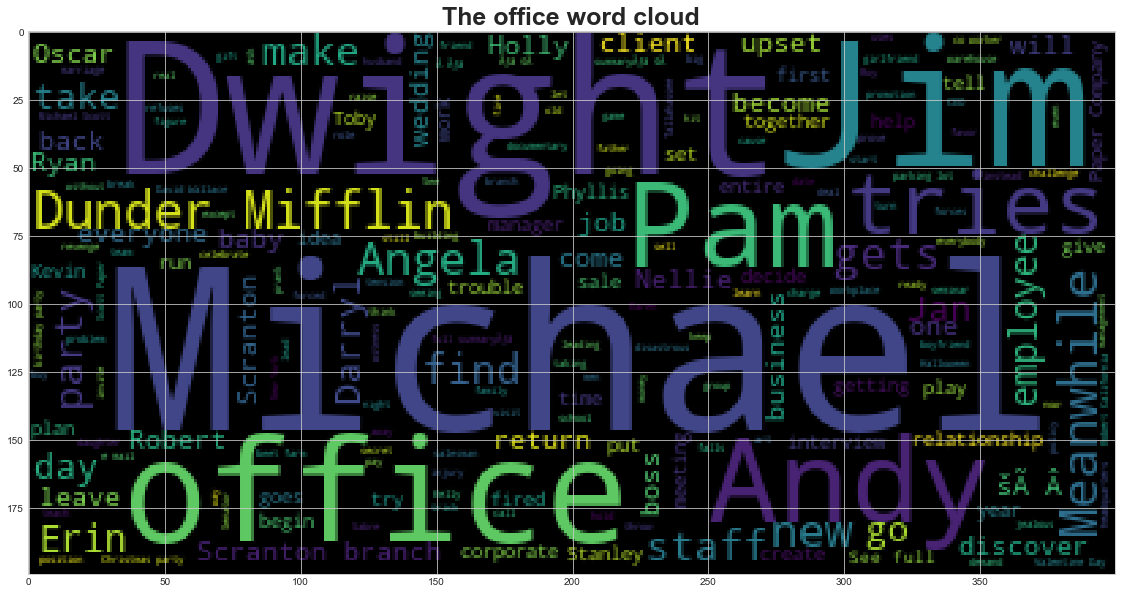

In [411]:
# Tokenize the wordcloud

sent['tokens'] = sent['About'].apply(tokenizer)
sent_string = ' '.join(sent.About)

wc = WordCloud().generate(sent_string)
plt.title('The office word cloud', fontsize=25, fontweight='bold')
plt.imshow(wc)

In [109]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

## Sentiment on most Frequent name in word cloud - "Michael"

In [413]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ericm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [414]:
# Add column to count the occurences of "Michael"

office_df['Michael_count']=0
office_df.head()

,EpisodeTitle,About,Ratings,Viewership,Date,Michael_count
0,Pilot,The premiere episode introduces the boss and s...,7.5,11.2,24 March 2005,0
1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,6.0,29 March 2005,0
2,Health Care,Michael leaves Dwight in charge of picking the...,7.8,5.8,5 April 2005,0
3,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,5.4,12 April 2005,0
4,Basketball,Michael and his staff challenge the warehouse ...,8.4,5.0,19 April 2005,0


In [415]:
# Create the sentiment scores DataFrame
NF_about_sentiments = []

for i in range(len(df5['About'])):
    
    try:
        text = office_df["About"][i]
        text_lst = text.split(' ')
        michael_count = 0
        for j in text_lst:
            if j=='Michael' or j=="Michael's":
                michael_count += 1
        office_df['Michael_count'][i] = michael_count
        date = office_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        NF_about_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "michael_count": michael_count
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
NF_about_df = pd.DataFrame(NF_about_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral", "michael_count"]
NF_about_df = NF_about_df[cols]

NF_about_df.head()


,date,text,compound,positive,negative,neutral,michael_count
0,24 March 2005,The premiere episode introduces the boss and s...,0.0000,0.000,0.000,1.000,0
1,29 March 2005,Michael's off color remark puts a sensitivity ...,0.2732,0.104,0.000,0.896,2
2,5 April 2005,Michael leaves Dwight in charge of picking the...,-0.5994,0.000,0.187,0.813,1
3,12 April 2005,"Just for a laugh, Jim agrees to an alliance wi...",0.6597,0.310,0.000,0.690,0
4,19 April 2005,Michael and his staff challenge the warehouse ...,0.3612,0.205,0.077,0.718,1


In [416]:
# Calculate the correlation matrix

NF_about_df.corr()

,compound,positive,negative,neutral,michael_count
compound,1.000000,0.688797,-0.785866,0.158884,-0.068316
positive,0.688797,1.000000,-0.219572,-0.554932,-0.101903
negative,-0.785866,-0.219572,1.000000,-0.689740,-0.013796
neutral,0.158884,-0.554932,-0.689740,1.000000,0.087467
michael_count,-0.068316,-0.101903,-0.013796,0.087467,1.000000


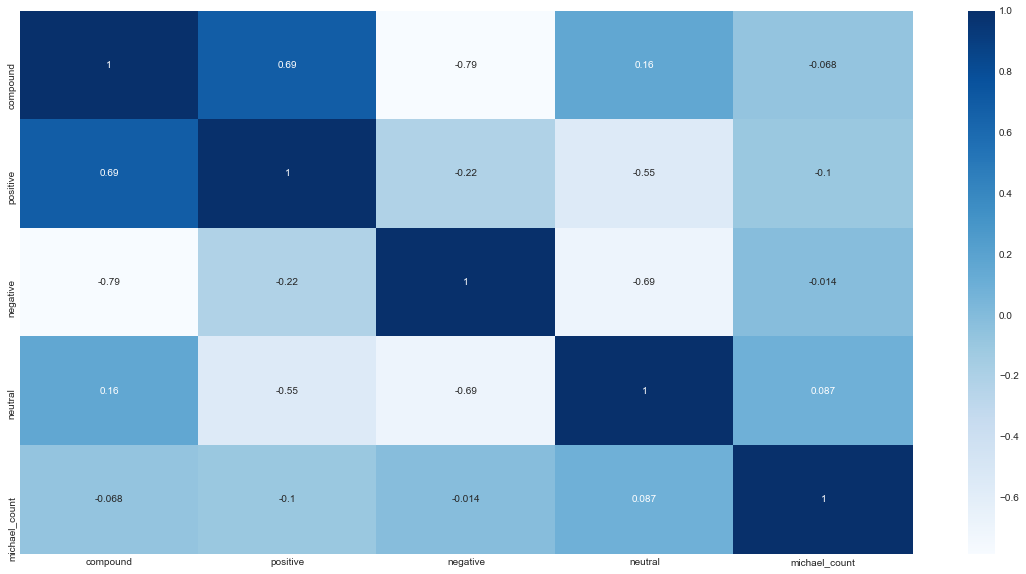

In [417]:
# Plot the correlation matrix

sns.heatmap(NF_about_df.corr(), cmap="Blues", annot=True)
plt.show()

## Average Ratings per episode vs. # times Michael appears - Compare ratings

In [402]:
# Find the average "rating" per episode
avg_rating= round(office_df.Ratings.mean(),2)
avg_views= round(office_df.Viewership.mean(),2)

print(f'Average Rating per episode is: {avg_rating}/10 & The Average Number of Views is: {avg_views} Million')

Average Rating per episode is: 8.24/10 & The Average Number of Views is: 7.25 Million


In [418]:
# Find the average "rating" per episode where Michael is mentioned 0 times

mc_0=office_df.loc[office_df['Michael_count']==0]

mc0_avg_rating= round(mc_0.Ratings.mean(),2)
mc0_avg_rating


7.87

In [419]:
# Find the average "rating" per episode where Michael is mentioned 1 times

mc_1=office_df.loc[office_df['Michael_count']==1]

mc1_avg_rating= round(mc_1.Ratings.mean(),2)
mc1_avg_rating

8.38

In [420]:
# Find the average "rating" per episode where Michael is mentioned 2 or more times

mc_2=office_df.loc[office_df['Michael_count']==2]

mc2_avg_rating= round(mc_2.Ratings.mean(),2)
mc2_avg_rating

8.54

In [463]:
mc_3=office_df.loc[office_df['Michael_count']==3]

mc3_avg_rating= round(mc_3.Ratings.mean(),2)
mc3_avg_rating

9.4

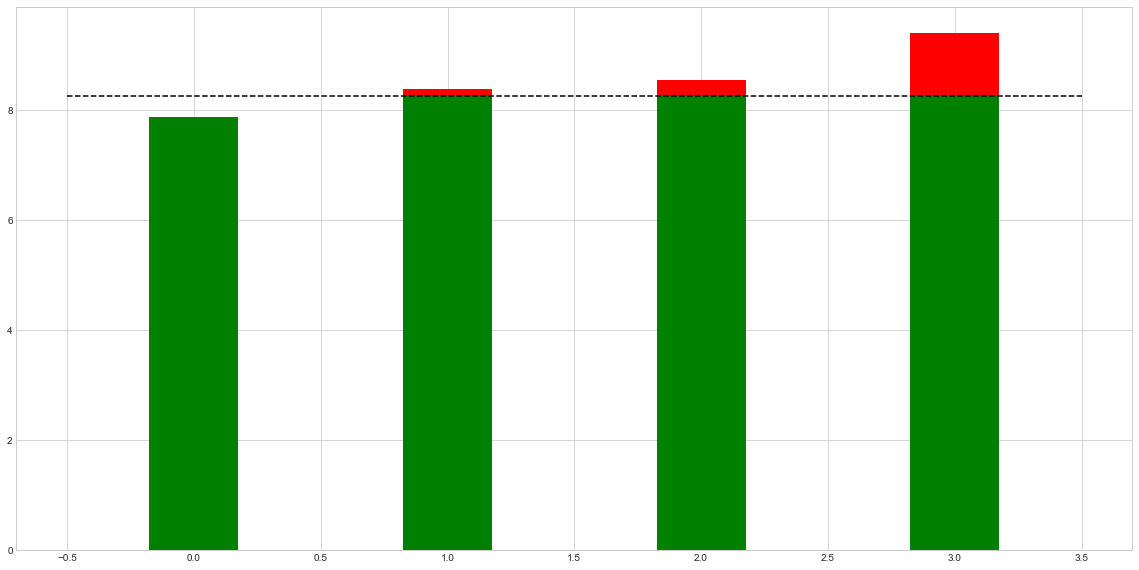

In [465]:
# Plot the average ratings scores vs the average rating per episode

threshold = avg_rating
values = np.array([7.87,8.38,8.54,9.4])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

# horizontal line indicating the threshold
ax.plot([-0.5, 3.5], [threshold, threshold], "k--")

# Testing Office data using NLP - "Michael"

In [424]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [425]:
# define X and Y
X=office_df[['Michael_count']]


In [426]:
max(X["Michael_count"])

3

In [427]:
y=office_df['Ratings'].ravel()
y[:5]


array([7.5, 8.3, 7.8, 8.1, 8.4])

In [429]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [430]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [431]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [432]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [433]:
 # Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [434]:
 # Fitting the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=500, random_state=78)

In [435]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

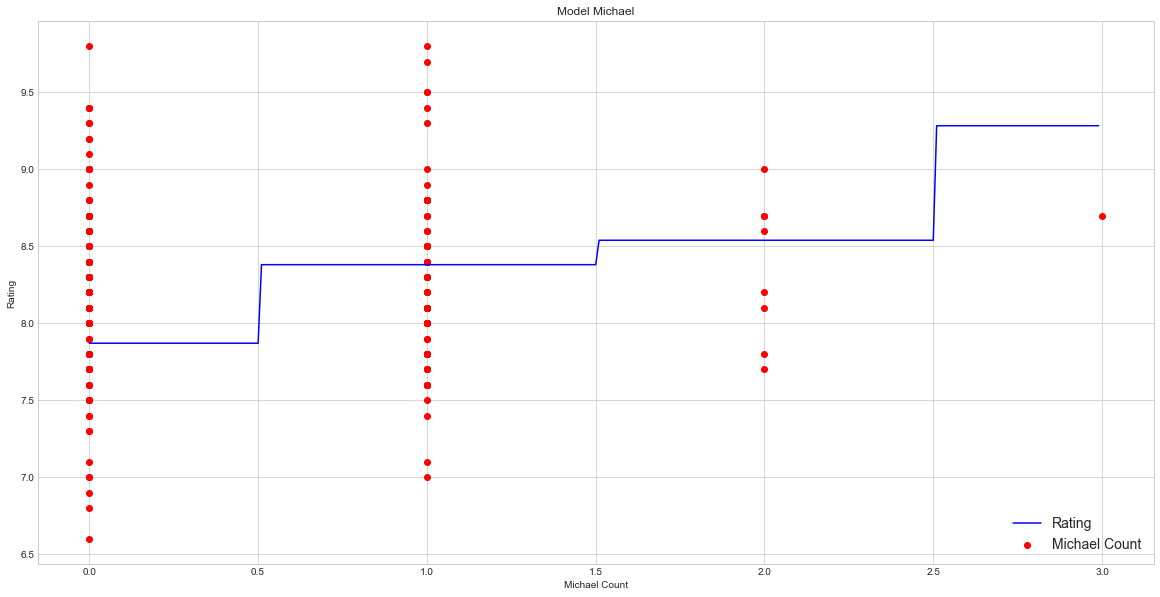

In [480]:
X_grid = np.arange(0, 3, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Model Michael')
plt.xlabel('Michael Count')
plt.ylabel('Rating')
plt.legend(['Rating','Michael Count'],fontsize=14,loc=4)
plt.show()

# Testing Office data using NLP - "Dwight"

In [447]:
# Read and copy data
dw_df=df1.copy()
dw_df=dw_df[['EpisodeTitle','About','Ratings','Viewership','Date']]
dw_df['Dwight_count']=0
dw_df.head()

,EpisodeTitle,About,Ratings,Viewership,Date,Dwight_count
0,Pilot,The premiere episode introduces the boss and s...,7.5,11.2,24 March 2005,0
1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,6.0,29 March 2005,0
2,Health Care,Michael leaves Dwight in charge of picking the...,7.8,5.8,5 April 2005,0
3,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,5.4,12 April 2005,0
4,Basketball,Michael and his staff challenge the warehouse ...,8.4,5.0,19 April 2005,0


In [455]:
# Create the sentiment scores DataFrame
dw_about_sentiments = []

for i in range(len(dw_df['About'])):
    
    try:
        text = dw_df["About"][i]
        text_lst = text.split(' ')
        dwight_count = 0
        for j in text_lst:
            if j=='Dwight' or j=="Dwight's":
                dwight_count += 1
        dw_df['Dwight_count'][i] = dwight_count
        date = dw_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        dw_about_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "dwight_count": dwight_count
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
dw_about_df = pd.DataFrame(dw_about_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral", "dwight_count"]
dw_about_df = dw_about_df[cols]

dw_about_df.tail()

,date,text,compound,positive,negative,neutral,dwight_count
183,11 April 2013,Dwight shoots Stanley with a bull tranquilizer...,0.4019,0.076,0.030,0.894,1
184,25 April 2013,The employees hold a paper airplane competitio...,0.0258,0.102,0.098,0.800,0
185,2 May 2013,Dwight becomes regional manager after Andy qui...,0.1280,0.078,0.066,0.856,1
186,9 May 2013,Dwight prepares for a marriage proposal and hi...,-0.0516,0.000,0.034,0.966,1
187,16 May 2013,"One year later, Dunder Mifflin employees past ...",0.0000,0.000,0.000,1.000,1


In [454]:
max(dw_df["Dwight_count"])

3

In [456]:
# Calculate the correlation matrix

dw_about_df.corr()

,compound,positive,negative,neutral,dwight_count
compound,1.000000,0.688797,-0.785866,0.158884,0.044978
positive,0.688797,1.000000,-0.219572,-0.554932,0.029959
negative,-0.785866,-0.219572,1.000000,-0.689740,-0.055744
neutral,0.158884,-0.554932,-0.689740,1.000000,0.025753
dwight_count,0.044978,0.029959,-0.055744,0.025753,1.000000


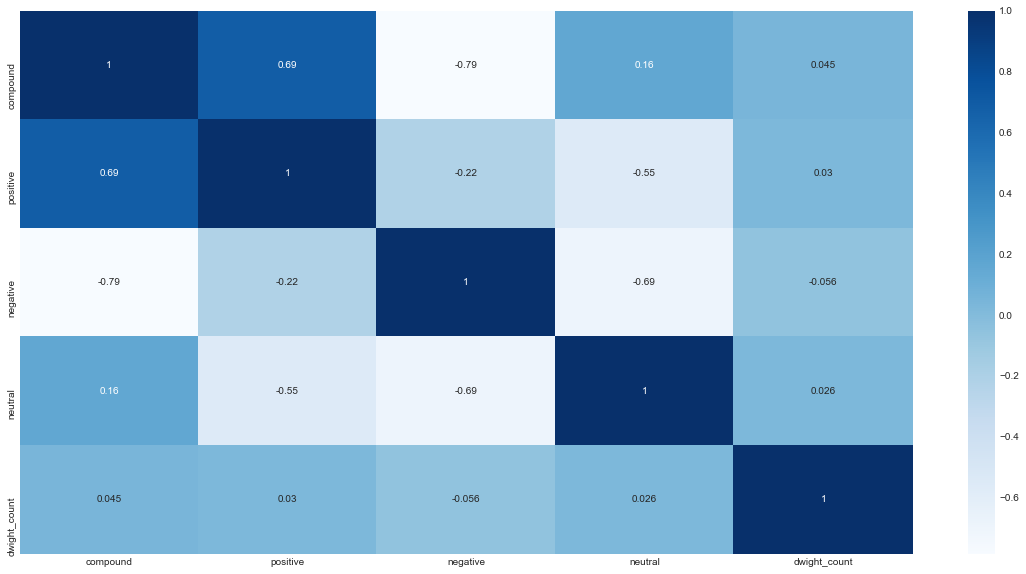

In [458]:
# Plot the correlation matrix

sns.heatmap(dw_about_df.corr(), cmap="Blues", annot=True)
plt.show()

In [495]:
dw_0=dw_df.loc[dw_df['Dwight_count']==0]

dw0_avg_rating= round(dw_0.Ratings.mean(),2)
dw0_avg_rating

8.22

In [496]:
dw_1=dw_df.loc[dw_df['Dwight_count']==1]

dw1_avg_rating= round(dw_1.Ratings.mean(),2)
dw1_avg_rating

8.25

In [497]:
dw_2=dw_df.loc[dw_df['Dwight_count']==2]

dw2_avg_rating= round(dw_2.Ratings.mean(),2)
dw2_avg_rating

8.35

In [498]:
dw_3=dw_df.loc[dw_df['Dwight_count']==3]

dw3_avg_rating= round(dw_3.Ratings.mean(),2)
dw3_avg_rating

8.7

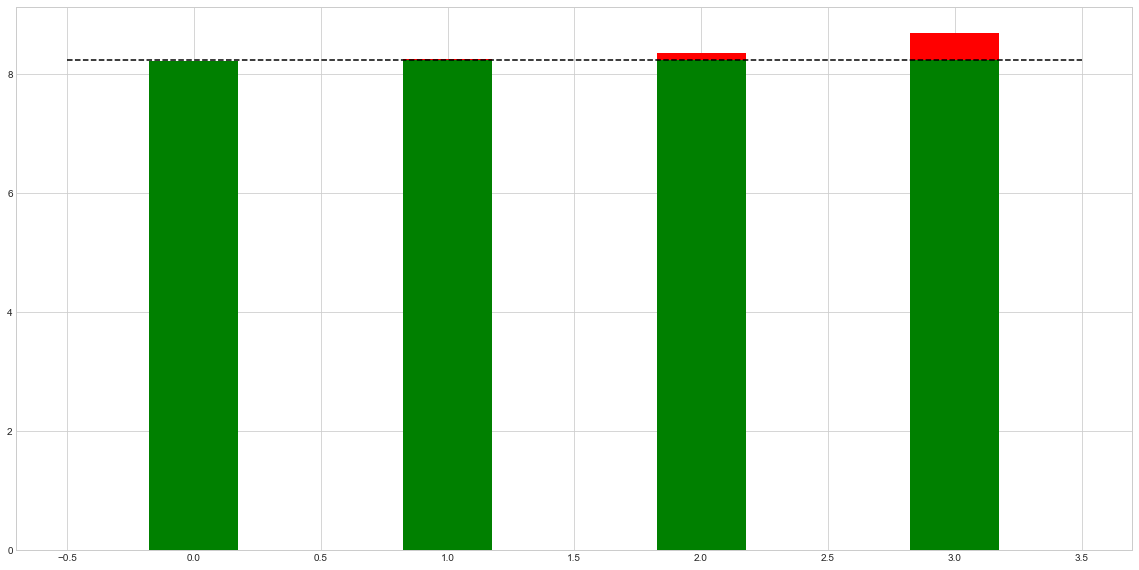

In [499]:
# Plot the average ratings scores vs the average rating per episode

threshold = avg_rating
values = np.array([8.22,8.25,8.35,8.7])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

# horizontal line indicating the threshold
ax.plot([-0.5, 3.5], [threshold, threshold], "k--")

In [467]:
# define X and Y
X=dw_df[['Dwight_count']]


In [468]:
y=dw_df['Ratings'].ravel()
y[:5]

array([7.5, 8.3, 7.8, 8.1, 8.4])

In [469]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [470]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [471]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [472]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [473]:
 # Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [474]:
 # Fitting the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=500, random_state=78)

In [475]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

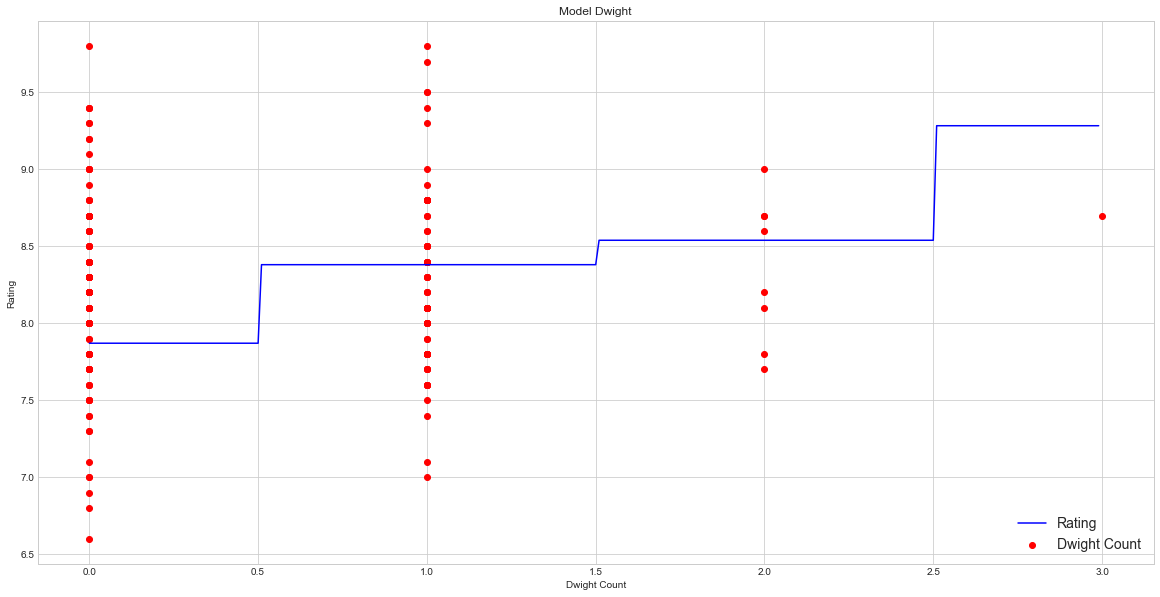

In [488]:
X_grid = np.arange(0, 3, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Model Dwight')
plt.xlabel('Dwight Count')
plt.ylabel('Rating')
plt.legend(['Rating','Dwight Count'],fontsize=14,loc=4)
plt.show()

## Testing Office data using NLP - "Michael" & Dwight" combined

In [491]:
# Read and copy data
bulk_df=df1.copy()
bulk_df=bulk_df[['EpisodeTitle','About','Ratings','Viewership','Date']]
bulk_df['Bulk_count']=0
bulk_df.head()

,EpisodeTitle,About,Ratings,Viewership,Date,Bulk_count
0,Pilot,The premiere episode introduces the boss and s...,7.5,11.2,24 March 2005,0
1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,6.0,29 March 2005,0
2,Health Care,Michael leaves Dwight in charge of picking the...,7.8,5.8,5 April 2005,0
3,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,5.4,12 April 2005,0
4,Basketball,Michael and his staff challenge the warehouse ...,8.4,5.0,19 April 2005,0


In [492]:
# Create the sentiment scores DataFrame
bulk_about_sentiments = []

for i in range(len(bulk_df['About'])):
    
    try:
        text = bulk_df["About"][i]
        text_lst = text.split(' ')
        bulk_count = 0
        for j in text_lst:
            if j=='Dwight' or j=="Dwight's" or j=="Michael" or j=="Michael's":
                bulk_count += 1
        bulk_df['Bulk_count'][i] = bulk_count
        date = bulk_df["Date"][i]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bulk_about_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu,
            "bulk_count": bulk_count
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bulk_about_df = pd.DataFrame(bulk_about_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral", "bulk_count"]
bulk_about_df = bulk_about_df[cols]

bulk_about_df.tail()

,date,text,compound,positive,negative,neutral,bulk_count
183,11 April 2013,Dwight shoots Stanley with a bull tranquilizer...,0.4019,0.076,0.030,0.894,1
184,25 April 2013,The employees hold a paper airplane competitio...,0.0258,0.102,0.098,0.800,0
185,2 May 2013,Dwight becomes regional manager after Andy qui...,0.1280,0.078,0.066,0.856,1
186,9 May 2013,Dwight prepares for a marriage proposal and hi...,-0.0516,0.000,0.034,0.966,1
187,16 May 2013,"One year later, Dunder Mifflin employees past ...",0.0000,0.000,0.000,1.000,1


In [493]:
max(bulk_df["Bulk_count"])

5

In [494]:
bulk_about_df.corr()

,compound,positive,negative,neutral,bulk_count
compound,1.000000,0.688797,-0.785866,0.158884,-0.020164
positive,0.688797,1.000000,-0.219572,-0.554932,-0.057124
negative,-0.785866,-0.219572,1.000000,-0.689740,-0.051290
neutral,0.158884,-0.554932,-0.689740,1.000000,0.086520
bulk_count,-0.020164,-0.057124,-0.051290,0.086520,1.000000


In [500]:
bulk_0=bulk_df.loc[bulk_df['Bulk_count']==0]

bulk0_avg_rating= round(bulk_0.Ratings.mean(),2)
bulk0_avg_rating

7.63

In [501]:
bulk_1=bulk_df.loc[bulk_df['Bulk_count']==1]

bulk1_avg_rating= round(bulk_1.Ratings.mean(),2)
bulk1_avg_rating

8.26

In [502]:
bulk_2=bulk_df.loc[bulk_df['Bulk_count']==2]

bulk2_avg_rating= round(bulk_2.Ratings.mean(),2)
bulk2_avg_rating

8.37

In [503]:
bulk_3=bulk_df.loc[bulk_df['Bulk_count']==3]

bulk3_avg_rating= round(bulk_3.Ratings.mean(),2)
bulk3_avg_rating

8.73

In [504]:
bulk_4=bulk_df.loc[bulk_df['Bulk_count']==4]

bulk4_avg_rating= round(bulk_4.Ratings.mean(),2)
bulk4_avg_rating

8.7

In [505]:
bulk_5=bulk_df.loc[bulk_df['Bulk_count']==5]

bulk5_avg_rating= round(bulk_5.Ratings.mean(),2)
bulk5_avg_rating

9.0

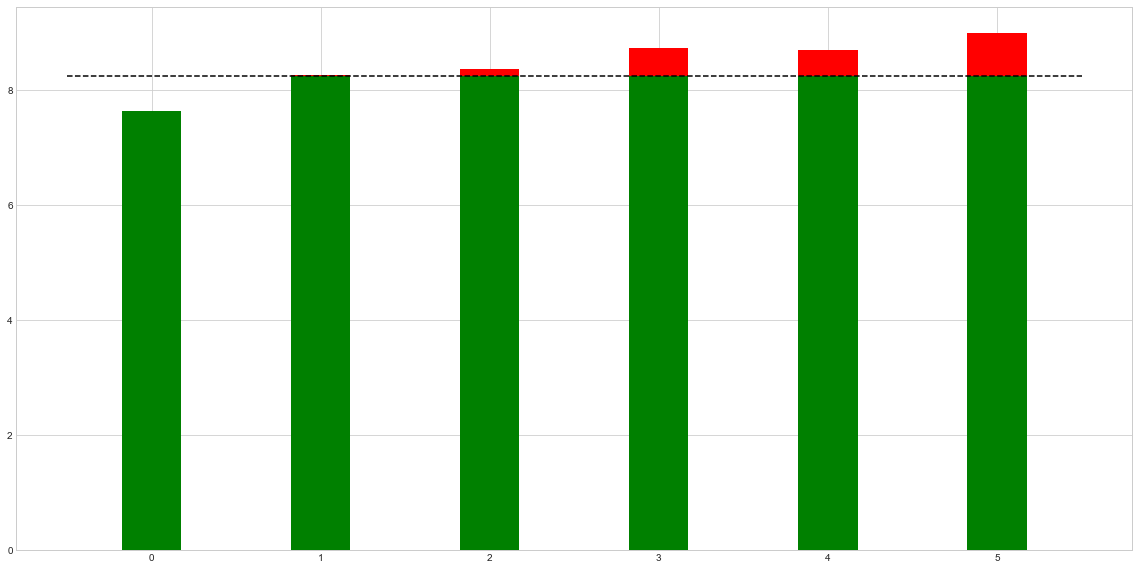

In [507]:
# Plot the average ratings scores vs the average rating per episode

threshold = avg_rating
values = np.array([7.63,8.26,8.37,8.73,8.7,9.0])
x = range(len(values))

# split it up
above_threshold = np.maximum(values - threshold, 0)
below_threshold = np.minimum(values, threshold)

# and plot it
fig, ax = plt.subplots()
ax.bar(x, below_threshold, 0.35, color="g")
ax.bar(x, above_threshold, 0.35, color="r",
        bottom=below_threshold)

# horizontal line indicating the threshold
ax.plot([-0.5, 5.5], [threshold, threshold], "k--")

In [509]:
# define X and Y
X=bulk_df[['Bulk_count']]


In [508]:
y=bulk_df['Ratings'].ravel()
y[:5]

array([7.5, 8.3, 7.8, 8.1, 8.4])

In [510]:
 # Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [511]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [512]:
 # Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [513]:
 # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [514]:
 # Create a random forest classifier
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)


In [515]:
 # Fitting the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=500, random_state=78)

In [516]:
 # Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

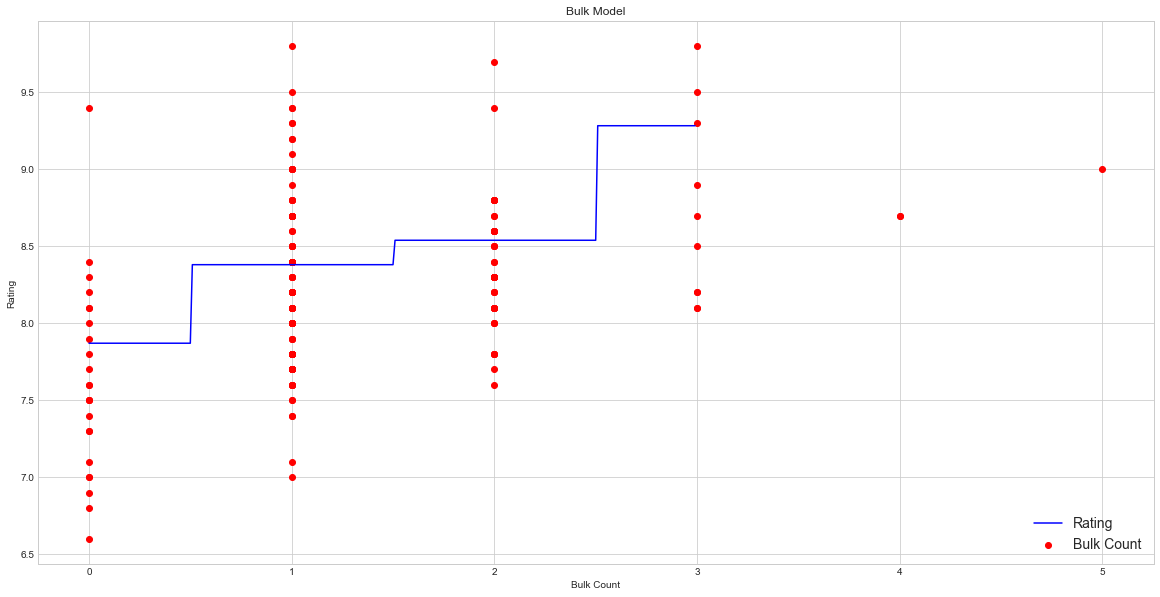

In [572]:
X_grid = np.arange(0, 3, 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Bulk Model')
plt.xlabel('Bulk Count')
plt.ylabel('Rating')
plt.legend(['Rating','Bulk Count'],fontsize=14,loc=4)
plt.show()

In [585]:
import hvplot.pandas
import holoviews as hv

In [599]:
# pull in aggregate ratings

Ratings_df= pd.read_csv(Path('Resources/bulk_freq_rating.csv'))

In [617]:
#plot aggregate ratings

Ratings_plot=Ratings_df.groupby(['Frequency','Index']).mean()
Ratings_plot.hvplot.bar(stacked=False, height=500, title='How different characters effect the rating of a show', rot=60)

:Bars   [Frequency,Index]   (Rating)

In [618]:
hline = hv.HLine(8.24)
hline.opts(
    color='red', 
    line_dash='dashed', 
    line_width=2.0)
    


:HLine   [x,y]